In [1]:
import os
import zarr
import random
import json
import warnings
import numpy as np
import pandas as pd
import torch.nn as nn
from pathlib import Path
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, Dataset
from collections import defaultdict
import sys

warnings.filterwarnings("ignore")
sys.path.append("./src/")

from src.config import CFG
from src.dataloader import (
    read_zarr,
    read_info_json,
    scale_coordinates,
    create_dataset,
    create_segmentation_map,
    EziiDataset,
    drop_padding,
)
from src.network import UNet_2D, aug
from src.utils import save_images
from src.metric import score, create_cls_pos, create_cls_pos_sikii, create_df
from metric import visualize_epoch_results

In [2]:
train_dataset = EziiDataset(
    exp_names=CFG.train_exp_names,
    base_dir="../../inputs/train/static",
    particles_name=CFG.particles_name,
    resolution=CFG.resolution,
    zarr_type=CFG.train_zarr_types,
)

valid_dataset = EziiDataset(
    exp_names=CFG.valid_exp_names,
    base_dir="../../inputs/train/static",
    particles_name=CFG.particles_name,
    resolution=CFG.resolution,
    zarr_type=CFG.valid_zarr_types,
)

from tqdm import tqdm

train_loader = DataLoader(train_dataset, batch_size=1, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=1, shuffle=False)

for data in tqdm(train_dataset):
    normalized_tomogram = data["normalized_tomogram"]
    segmentation_map = data["segmentation_map"]
    break

# normalized_tomogram =
normalized_tomogram.shape[0]

[('TS_5_4', 'denoised'), ('TS_73_6', 'denoised'), ('TS_99_9', 'denoised'), ('TS_6_4', 'denoised'), ('TS_69_2', 'denoised')]
[('TS_86_3', 'denoised'), ('TS_6_6', 'denoised')]


  0%|          | 0/5 [00:00<?, ?it/s]


92

In [3]:
import torch
import torchvision.transforms.functional as F
import random

Train-Epoch: 0, Loss: 1.556421318921176:  96%|█████████▋| 55/57 [00:18<00:00,  3.05it/s] 


####################### valid-experiments: TS_69_2 #######################
####################### valid-experiments: TS_5_4 #######################
####################### valid-experiments: TS_6_4 #######################
####################### valid-experiments: TS_99_9 #######################
####################### valid-experiments: TS_73_6 #######################
EPOCH: 0, TRAIN_SCORE: 0.027880594726695913


Valid-Epoch: 0, Loss: 1.0407164556824642: 100%|██████████| 184/184 [00:07<00:00, 24.83it/s]


####################### valid-experiments: TS_86_3 #######################
####################### valid-experiments: TS_6_6 #######################
EPOCH: 0, VALID_SCORE: 0.01597093707512462


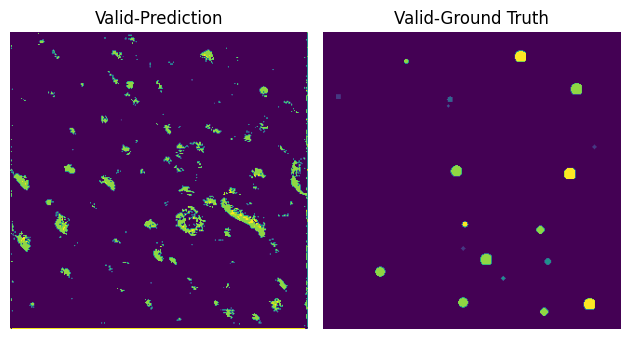

Train-Epoch: 1, Loss: 0.8656868295236068:  96%|█████████▋| 55/57 [00:17<00:00,  3.23it/s]


####################### valid-experiments: TS_73_6 #######################
####################### valid-experiments: TS_69_2 #######################
####################### valid-experiments: TS_6_4 #######################
####################### valid-experiments: TS_5_4 #######################
####################### valid-experiments: TS_99_9 #######################
EPOCH: 1, TRAIN_SCORE: 0.036597607000020224


Valid-Epoch: 1, Loss: 0.5248292976909358: 100%|██████████| 184/184 [00:07<00:00, 25.38it/s] 


####################### valid-experiments: TS_86_3 #######################
####################### valid-experiments: TS_6_6 #######################
EPOCH: 1, VALID_SCORE: 0.008863779633284882


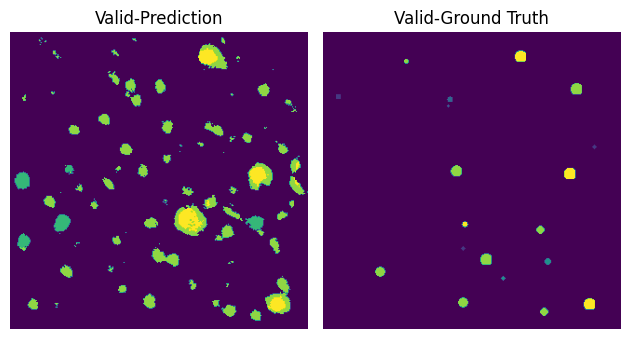

Train-Epoch: 2, Loss: 0.6654973566532135:  96%|█████████▋| 55/57 [00:17<00:00,  3.22it/s]


####################### valid-experiments: TS_6_4 #######################
####################### valid-experiments: TS_99_9 #######################
####################### valid-experiments: TS_5_4 #######################
####################### valid-experiments: TS_73_6 #######################
####################### valid-experiments: TS_69_2 #######################
EPOCH: 2, TRAIN_SCORE: 0.0649042761997796


Valid-Epoch: 2, Loss: 0.5810761651550622: 100%|██████████| 184/184 [00:06<00:00, 28.66it/s]


####################### valid-experiments: TS_86_3 #######################
####################### valid-experiments: TS_6_6 #######################
EPOCH: 2, VALID_SCORE: 0.011885395057067778


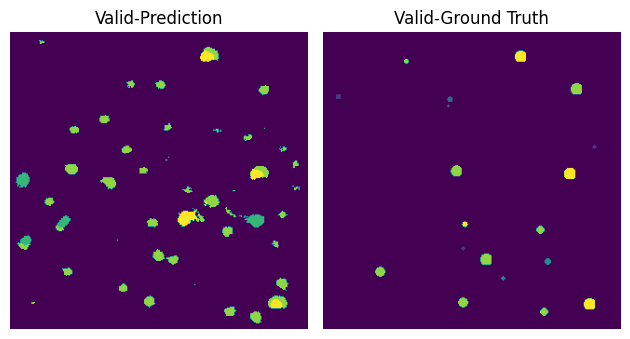

Train-Epoch: 3, Loss: 0.5934086485342546:  96%|█████████▋| 55/57 [00:16<00:00,  3.26it/s]


####################### valid-experiments: TS_5_4 #######################
####################### valid-experiments: TS_69_2 #######################
####################### valid-experiments: TS_6_4 #######################
####################### valid-experiments: TS_99_9 #######################
####################### valid-experiments: TS_73_6 #######################
EPOCH: 3, TRAIN_SCORE: 0.02102647087544054


Valid-Epoch: 3, Loss: 0.7570642977143112: 100%|██████████| 184/184 [00:06<00:00, 30.12it/s]


####################### valid-experiments: TS_86_3 #######################
####################### valid-experiments: TS_6_6 #######################
EPOCH: 3, VALID_SCORE: 0.023720321455266265


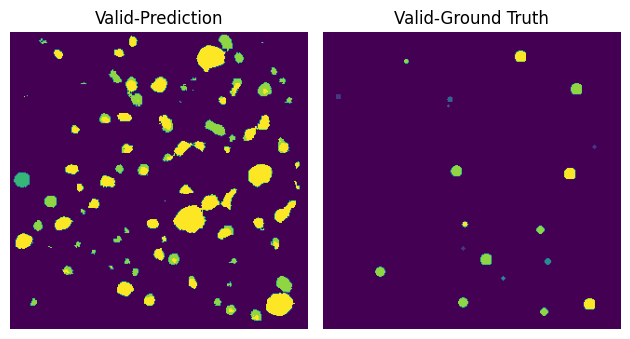

Train-Epoch: 4, Loss: 0.6035195421088826:  96%|█████████▋| 55/57 [00:16<00:00,  3.28it/s]


####################### valid-experiments: TS_73_6 #######################
####################### valid-experiments: TS_5_4 #######################
####################### valid-experiments: TS_99_9 #######################
####################### valid-experiments: TS_6_4 #######################
####################### valid-experiments: TS_69_2 #######################
EPOCH: 4, TRAIN_SCORE: 0.0724967357034949


Valid-Epoch: 4, Loss: 0.38644677909779485: 100%|██████████| 184/184 [00:07<00:00, 24.82it/s]


####################### valid-experiments: TS_86_3 #######################
####################### valid-experiments: TS_6_6 #######################
EPOCH: 4, VALID_SCORE: 0.16298825848244114


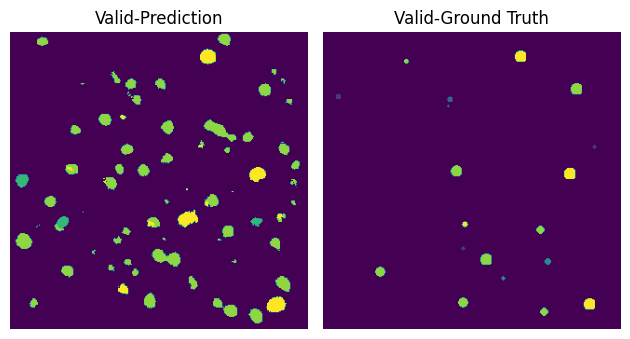

Train-Epoch: 5, Loss: 0.5637344354932958:  96%|█████████▋| 55/57 [00:17<00:00,  3.23it/s]


####################### valid-experiments: TS_69_2 #######################
####################### valid-experiments: TS_73_6 #######################
####################### valid-experiments: TS_5_4 #######################
####################### valid-experiments: TS_99_9 #######################
####################### valid-experiments: TS_6_4 #######################
EPOCH: 5, TRAIN_SCORE: 0.07202279633311078


Valid-Epoch: 5, Loss: 0.3895100434310734: 100%|██████████| 184/184 [00:07<00:00, 25.50it/s] 


####################### valid-experiments: TS_86_3 #######################
####################### valid-experiments: TS_6_6 #######################
EPOCH: 5, VALID_SCORE: 0.1874516782320787


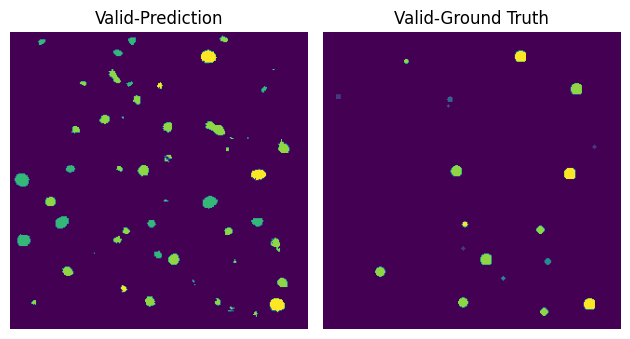

Train-Epoch: 6, Loss: 0.5477014633742245:  96%|█████████▋| 55/57 [00:17<00:00,  3.23it/s]


####################### valid-experiments: TS_69_2 #######################
####################### valid-experiments: TS_99_9 #######################
####################### valid-experiments: TS_5_4 #######################
####################### valid-experiments: TS_6_4 #######################
####################### valid-experiments: TS_73_6 #######################
EPOCH: 6, TRAIN_SCORE: 0.06173833616829527


Valid-Epoch: 6, Loss: 0.31378502717606077: 100%|██████████| 184/184 [00:06<00:00, 27.37it/s]


####################### valid-experiments: TS_86_3 #######################
####################### valid-experiments: TS_6_6 #######################
EPOCH: 6, VALID_SCORE: 0.17068436492267602


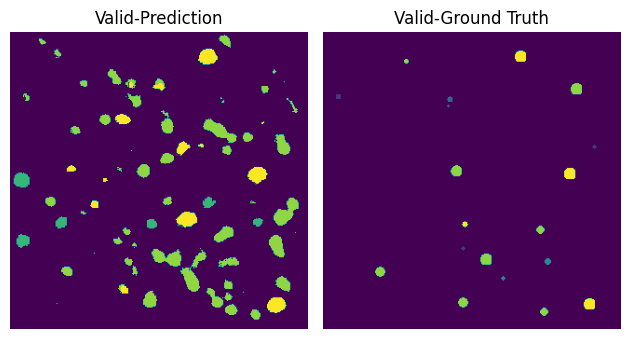

Train-Epoch: 7, Loss: 0.5585529771718112:  96%|█████████▋| 55/57 [00:16<00:00,  3.26it/s]


####################### valid-experiments: TS_6_4 #######################
####################### valid-experiments: TS_73_6 #######################
####################### valid-experiments: TS_5_4 #######################
####################### valid-experiments: TS_69_2 #######################
####################### valid-experiments: TS_99_9 #######################
EPOCH: 7, TRAIN_SCORE: 0.07586024879761442


Valid-Epoch: 7, Loss: 0.4158468806063351: 100%|██████████| 184/184 [00:06<00:00, 28.06it/s] 


####################### valid-experiments: TS_86_3 #######################
####################### valid-experiments: TS_6_6 #######################
EPOCH: 7, VALID_SCORE: 0.17948972614613723


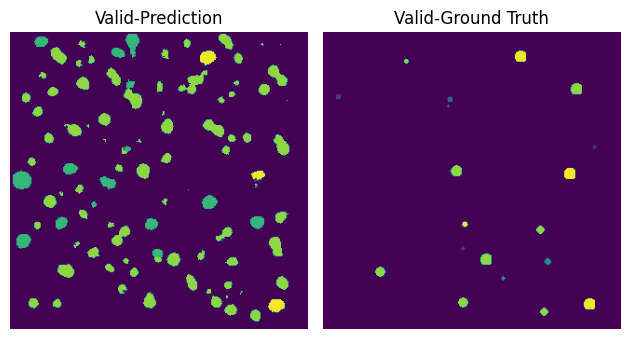

Train-Epoch: 8, Loss: 0.569760430671952:  96%|█████████▋| 55/57 [00:16<00:00,  3.29it/s] 


####################### valid-experiments: TS_99_9 #######################
####################### valid-experiments: TS_69_2 #######################
####################### valid-experiments: TS_5_4 #######################
####################### valid-experiments: TS_6_4 #######################
####################### valid-experiments: TS_73_6 #######################
EPOCH: 8, TRAIN_SCORE: 0.0780176033837609


Valid-Epoch: 8, Loss: 0.2981784668062692: 100%|██████████| 184/184 [00:06<00:00, 29.09it/s] 


####################### valid-experiments: TS_86_3 #######################
####################### valid-experiments: TS_6_6 #######################
EPOCH: 8, VALID_SCORE: 0.17307504997784356


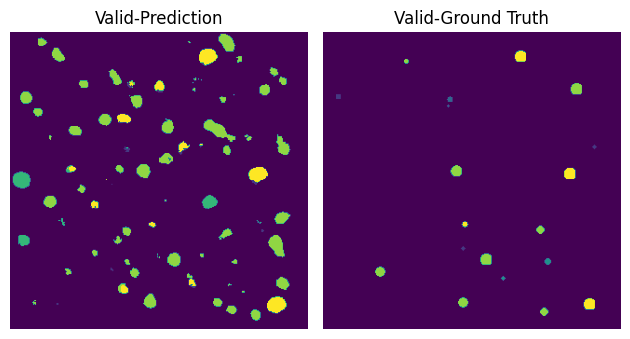

Train-Epoch: 9, Loss: 0.562320504676212:  96%|█████████▋| 55/57 [00:16<00:00,  3.31it/s]  


####################### valid-experiments: TS_69_2 #######################
####################### valid-experiments: TS_73_6 #######################
####################### valid-experiments: TS_6_4 #######################
####################### valid-experiments: TS_99_9 #######################
####################### valid-experiments: TS_5_4 #######################
EPOCH: 9, TRAIN_SCORE: 0.07671512948488929


Valid-Epoch: 9, Loss: 0.3744637711864451: 100%|██████████| 184/184 [00:06<00:00, 27.22it/s] 


####################### valid-experiments: TS_86_3 #######################
####################### valid-experiments: TS_6_6 #######################
EPOCH: 9, VALID_SCORE: 0.1850752184963806


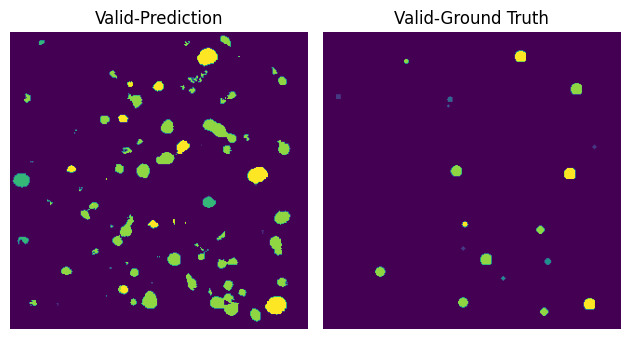

Train-Epoch: 10, Loss: 0.5485797535289417:  96%|█████████▋| 55/57 [00:16<00:00,  3.24it/s] 


####################### valid-experiments: TS_5_4 #######################
####################### valid-experiments: TS_69_2 #######################
####################### valid-experiments: TS_6_4 #######################
####################### valid-experiments: TS_99_9 #######################
####################### valid-experiments: TS_73_6 #######################
EPOCH: 10, TRAIN_SCORE: 0.07760369128626576


Valid-Epoch: 10, Loss: 0.36446022975218034: 100%|██████████| 184/184 [00:06<00:00, 28.75it/s]


####################### valid-experiments: TS_86_3 #######################
####################### valid-experiments: TS_6_6 #######################
EPOCH: 10, VALID_SCORE: 0.18878351466091606


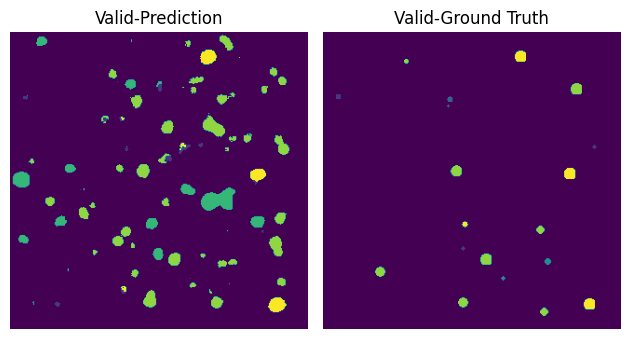

Train-Epoch: 11, Loss: 0.49273809492588044:  96%|█████████▋| 55/57 [00:17<00:00,  3.23it/s]


####################### valid-experiments: TS_5_4 #######################
####################### valid-experiments: TS_99_9 #######################
####################### valid-experiments: TS_73_6 #######################
####################### valid-experiments: TS_69_2 #######################
####################### valid-experiments: TS_6_4 #######################
EPOCH: 11, TRAIN_SCORE: 0.07969152658846704


Valid-Epoch: 11, Loss: 0.36468520154670364: 100%|██████████| 184/184 [00:06<00:00, 26.98it/s]


####################### valid-experiments: TS_86_3 #######################
####################### valid-experiments: TS_6_6 #######################
EPOCH: 11, VALID_SCORE: 0.1969376998530082


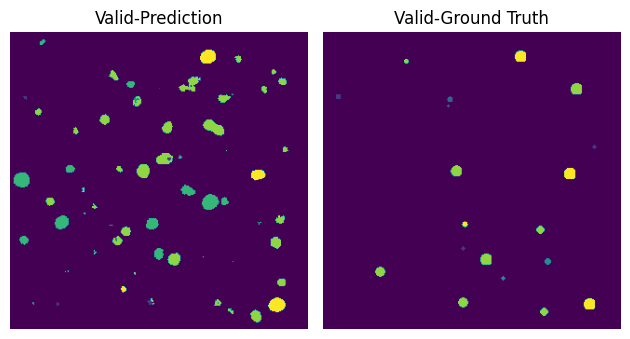

Train-Epoch: 12, Loss: 0.49427142630923876:  96%|█████████▋| 55/57 [00:16<00:00,  3.31it/s]


####################### valid-experiments: TS_69_2 #######################
####################### valid-experiments: TS_73_6 #######################
####################### valid-experiments: TS_6_4 #######################
####################### valid-experiments: TS_5_4 #######################
####################### valid-experiments: TS_99_9 #######################
EPOCH: 12, TRAIN_SCORE: 0.08758626753043179


Valid-Epoch: 12, Loss: 0.36122712481807434: 100%|██████████| 184/184 [00:07<00:00, 26.10it/s]


####################### valid-experiments: TS_86_3 #######################
####################### valid-experiments: TS_6_6 #######################
EPOCH: 12, VALID_SCORE: 0.1872818110036148


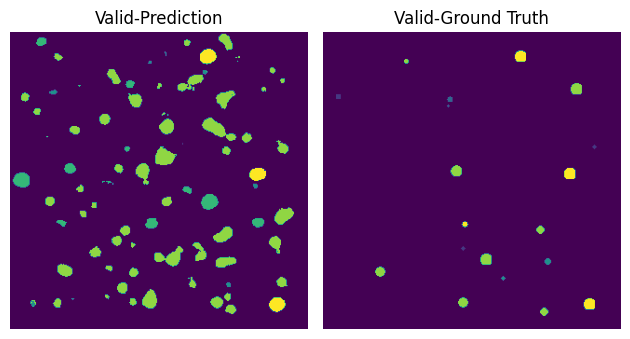

Train-Epoch: 13, Loss: 0.4784864688461477:  96%|█████████▋| 55/57 [00:16<00:00,  3.33it/s] 


####################### valid-experiments: TS_73_6 #######################
####################### valid-experiments: TS_5_4 #######################
####################### valid-experiments: TS_69_2 #######################
####################### valid-experiments: TS_6_4 #######################
####################### valid-experiments: TS_99_9 #######################
EPOCH: 13, TRAIN_SCORE: 0.0813730121934216


Valid-Epoch: 13, Loss: 0.3414047058145313: 100%|██████████| 184/184 [00:06<00:00, 28.96it/s] 


####################### valid-experiments: TS_86_3 #######################
####################### valid-experiments: TS_6_6 #######################
EPOCH: 13, VALID_SCORE: 0.17524534189858154


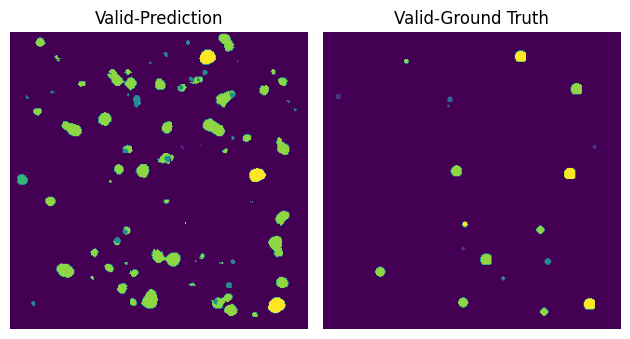

Train-Epoch: 14, Loss: 0.43645754862915387:  96%|█████████▋| 55/57 [00:16<00:00,  3.40it/s]


####################### valid-experiments: TS_99_9 #######################
####################### valid-experiments: TS_73_6 #######################
####################### valid-experiments: TS_5_4 #######################
####################### valid-experiments: TS_69_2 #######################
####################### valid-experiments: TS_6_4 #######################
EPOCH: 14, TRAIN_SCORE: 0.08354098857237457


Valid-Epoch: 14, Loss: 0.7212696581795488: 100%|██████████| 184/184 [00:06<00:00, 30.49it/s]


####################### valid-experiments: TS_86_3 #######################
####################### valid-experiments: TS_6_6 #######################
EPOCH: 14, VALID_SCORE: 0.18434288620843997


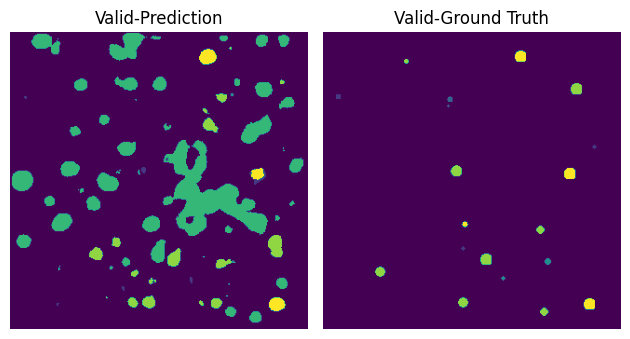

Train-Epoch: 15, Loss: 0.48515048135410654:  96%|█████████▋| 55/57 [00:16<00:00,  3.39it/s]


####################### valid-experiments: TS_5_4 #######################
####################### valid-experiments: TS_73_6 #######################
####################### valid-experiments: TS_69_2 #######################
####################### valid-experiments: TS_6_4 #######################
####################### valid-experiments: TS_99_9 #######################
EPOCH: 15, TRAIN_SCORE: 0.08383443580513766


Valid-Epoch: 15, Loss: 0.32855167956617864: 100%|██████████| 184/184 [00:06<00:00, 29.63it/s]


####################### valid-experiments: TS_86_3 #######################
####################### valid-experiments: TS_6_6 #######################
EPOCH: 15, VALID_SCORE: 0.1819397979232154


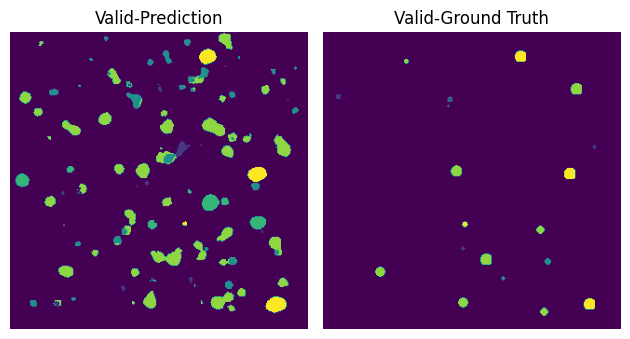

Train-Epoch: 16, Loss: 0.4551851977001537:  96%|█████████▋| 55/57 [00:16<00:00,  3.37it/s] 


####################### valid-experiments: TS_73_6 #######################
####################### valid-experiments: TS_6_4 #######################
####################### valid-experiments: TS_69_2 #######################
####################### valid-experiments: TS_99_9 #######################
####################### valid-experiments: TS_5_4 #######################
EPOCH: 16, TRAIN_SCORE: 0.08208948586206792


Valid-Epoch: 16, Loss: 0.38471756733791984: 100%|██████████| 184/184 [00:06<00:00, 29.76it/s]


####################### valid-experiments: TS_86_3 #######################
####################### valid-experiments: TS_6_6 #######################
EPOCH: 16, VALID_SCORE: 0.18508287349019573


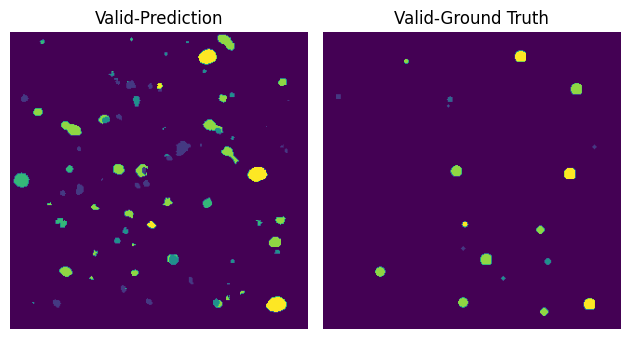

Train-Epoch: 17, Loss: 0.4346862589771097:  96%|█████████▋| 55/57 [00:16<00:00,  3.38it/s] 


####################### valid-experiments: TS_6_4 #######################
####################### valid-experiments: TS_73_6 #######################
####################### valid-experiments: TS_69_2 #######################
####################### valid-experiments: TS_99_9 #######################
####################### valid-experiments: TS_5_4 #######################
EPOCH: 17, TRAIN_SCORE: 0.0795555899949564


Valid-Epoch: 17, Loss: 0.477370138396509: 100%|██████████| 184/184 [00:06<00:00, 28.55it/s]  


####################### valid-experiments: TS_86_3 #######################
####################### valid-experiments: TS_6_6 #######################
EPOCH: 17, VALID_SCORE: 0.1846699941081931


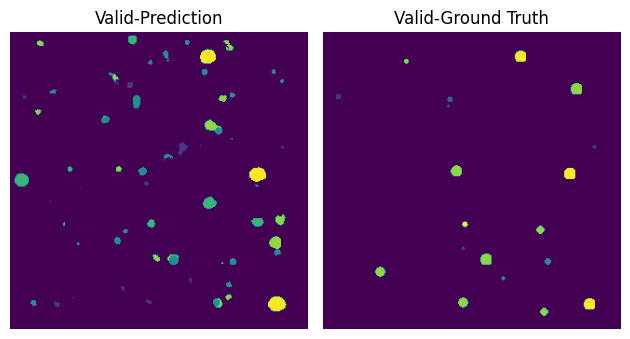

Train-Epoch: 18, Loss: 0.3832433131608096:  96%|█████████▋| 55/57 [00:16<00:00,  3.41it/s] 


####################### valid-experiments: TS_6_4 #######################
####################### valid-experiments: TS_69_2 #######################
####################### valid-experiments: TS_5_4 #######################
####################### valid-experiments: TS_99_9 #######################
####################### valid-experiments: TS_73_6 #######################
EPOCH: 18, TRAIN_SCORE: 0.08565454174845819


Valid-Epoch: 18, Loss: 0.44151313619627414: 100%|██████████| 184/184 [00:07<00:00, 25.92it/s]


####################### valid-experiments: TS_86_3 #######################
####################### valid-experiments: TS_6_6 #######################
EPOCH: 18, VALID_SCORE: 0.18492306350521392


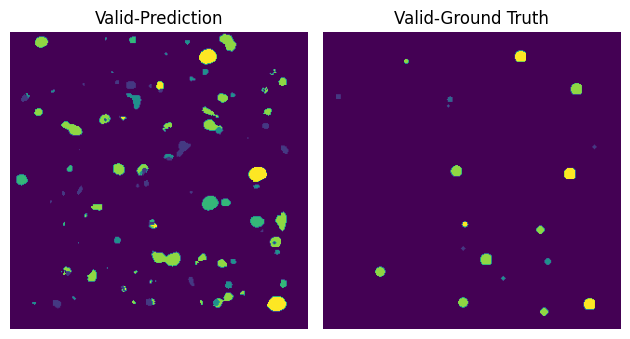

Train-Epoch: 19, Loss: 0.4336970627307892:  96%|█████████▋| 55/57 [00:16<00:00,  3.33it/s] 


####################### valid-experiments: TS_5_4 #######################
####################### valid-experiments: TS_6_4 #######################
####################### valid-experiments: TS_69_2 #######################
####################### valid-experiments: TS_73_6 #######################
####################### valid-experiments: TS_99_9 #######################
EPOCH: 19, TRAIN_SCORE: 0.08251611295204583


Valid-Epoch: 19, Loss: 0.4299792309580168: 100%|██████████| 184/184 [00:06<00:00, 28.53it/s] 


####################### valid-experiments: TS_86_3 #######################
####################### valid-experiments: TS_6_6 #######################
EPOCH: 19, VALID_SCORE: 0.19109291463942074


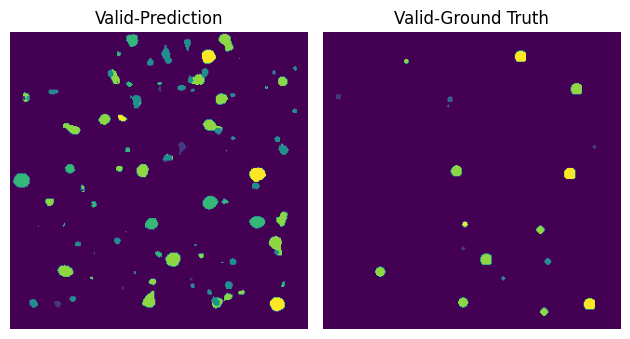

Train-Epoch: 20, Loss: 0.46606993323022666:  96%|█████████▋| 55/57 [00:16<00:00,  3.33it/s]


####################### valid-experiments: TS_73_6 #######################
####################### valid-experiments: TS_5_4 #######################
####################### valid-experiments: TS_6_4 #######################
####################### valid-experiments: TS_69_2 #######################
####################### valid-experiments: TS_99_9 #######################
EPOCH: 20, TRAIN_SCORE: 0.07614729978982093


Valid-Epoch: 20, Loss: 0.4038370695337147: 100%|██████████| 184/184 [00:06<00:00, 27.99it/s] 


####################### valid-experiments: TS_86_3 #######################
####################### valid-experiments: TS_6_6 #######################
EPOCH: 20, VALID_SCORE: 0.1873464712327399


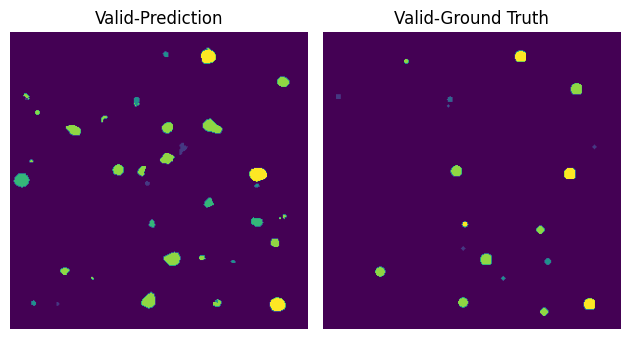

Train-Epoch: 21, Loss: 0.4068641955202276:  96%|█████████▋| 55/57 [00:16<00:00,  3.38it/s] 


####################### valid-experiments: TS_69_2 #######################
####################### valid-experiments: TS_99_9 #######################
####################### valid-experiments: TS_6_4 #######################
####################### valid-experiments: TS_73_6 #######################
####################### valid-experiments: TS_5_4 #######################
EPOCH: 21, TRAIN_SCORE: 0.08520339345798192


Valid-Epoch: 21, Loss: 0.4000186745543033: 100%|██████████| 184/184 [00:07<00:00, 25.55it/s] 


####################### valid-experiments: TS_86_3 #######################
####################### valid-experiments: TS_6_6 #######################
EPOCH: 21, VALID_SCORE: 0.17846068848646726


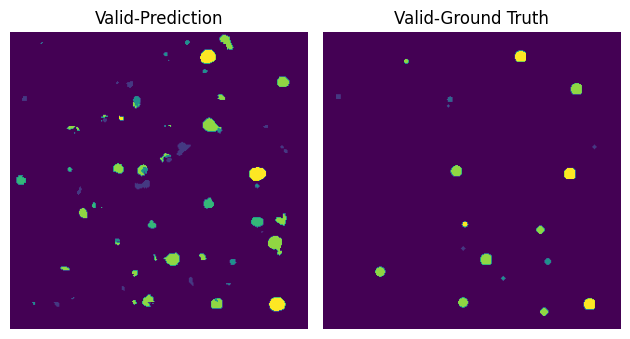

Train-Epoch: 22, Loss: 0.4492843359708786:  96%|█████████▋| 55/57 [00:16<00:00,  3.24it/s] 


####################### valid-experiments: TS_5_4 #######################
####################### valid-experiments: TS_99_9 #######################
####################### valid-experiments: TS_73_6 #######################
####################### valid-experiments: TS_69_2 #######################
####################### valid-experiments: TS_6_4 #######################
EPOCH: 22, TRAIN_SCORE: 0.07750669781590375


Valid-Epoch: 22, Loss: 0.45276126138987427: 100%|██████████| 184/184 [00:06<00:00, 27.89it/s]


####################### valid-experiments: TS_86_3 #######################
####################### valid-experiments: TS_6_6 #######################
EPOCH: 22, VALID_SCORE: 0.1817245017512037


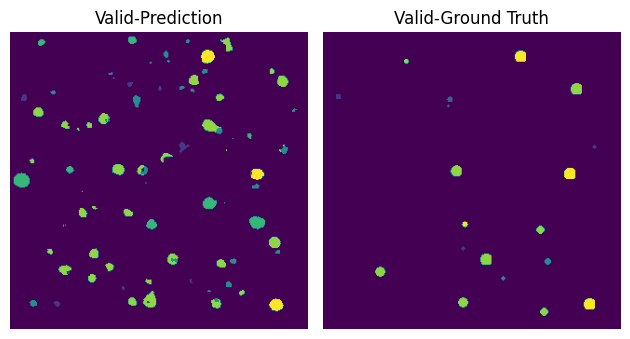

Train-Epoch: 23, Loss: 0.4007444544271989:  96%|█████████▋| 55/57 [00:16<00:00,  3.25it/s] 


####################### valid-experiments: TS_73_6 #######################
####################### valid-experiments: TS_99_9 #######################
####################### valid-experiments: TS_6_4 #######################
####################### valid-experiments: TS_69_2 #######################
####################### valid-experiments: TS_5_4 #######################
EPOCH: 23, TRAIN_SCORE: 0.07650767157694667


Valid-Epoch: 23, Loss: 0.5461012224879359: 100%|██████████| 184/184 [00:06<00:00, 28.27it/s] 


####################### valid-experiments: TS_86_3 #######################
####################### valid-experiments: TS_6_6 #######################
EPOCH: 23, VALID_SCORE: 0.1698820123144575


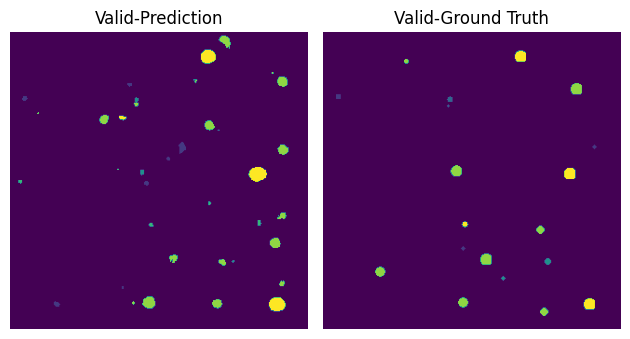

Train-Epoch: 24, Loss: 0.46942162161523643:  96%|█████████▋| 55/57 [00:16<00:00,  3.27it/s]


####################### valid-experiments: TS_6_4 #######################
####################### valid-experiments: TS_99_9 #######################
####################### valid-experiments: TS_73_6 #######################
####################### valid-experiments: TS_69_2 #######################
####################### valid-experiments: TS_5_4 #######################
EPOCH: 24, TRAIN_SCORE: 0.09542418910718321


Valid-Epoch: 24, Loss: 0.4826391819616496: 100%|██████████| 184/184 [00:07<00:00, 24.58it/s] 


####################### valid-experiments: TS_86_3 #######################
####################### valid-experiments: TS_6_6 #######################
EPOCH: 24, VALID_SCORE: 0.09955385411660109


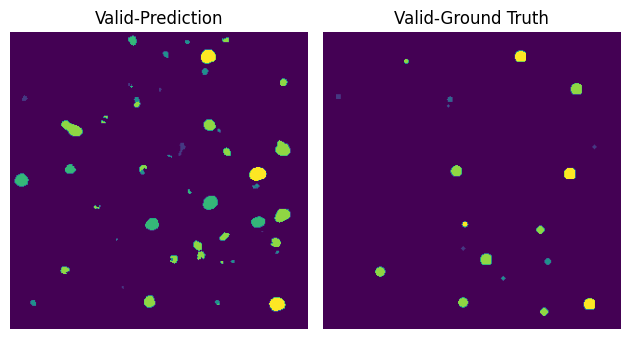

Train-Epoch: 25, Loss: 0.49013581438498066:  96%|█████████▋| 55/57 [00:17<00:00,  3.23it/s]


####################### valid-experiments: TS_99_9 #######################
####################### valid-experiments: TS_5_4 #######################
####################### valid-experiments: TS_73_6 #######################
####################### valid-experiments: TS_6_4 #######################
####################### valid-experiments: TS_69_2 #######################
EPOCH: 25, TRAIN_SCORE: 0.07635653055187228


Valid-Epoch: 25, Loss: 0.3861136191104458: 100%|██████████| 184/184 [00:06<00:00, 26.94it/s] 


####################### valid-experiments: TS_86_3 #######################
####################### valid-experiments: TS_6_6 #######################
EPOCH: 25, VALID_SCORE: 0.17523033053710838


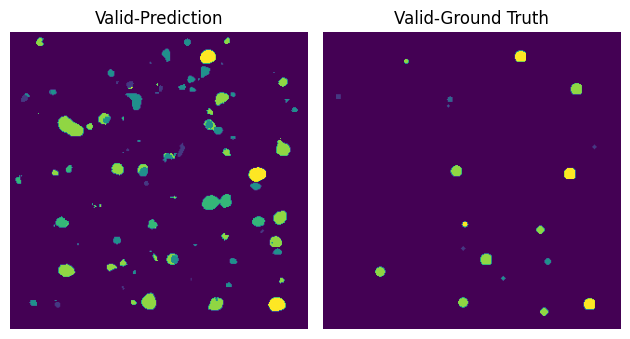

Train-Epoch: 26, Loss: 0.4240893545475873:  96%|█████████▋| 55/57 [00:16<00:00,  3.26it/s] 


####################### valid-experiments: TS_73_6 #######################
####################### valid-experiments: TS_5_4 #######################
####################### valid-experiments: TS_6_4 #######################
####################### valid-experiments: TS_99_9 #######################
####################### valid-experiments: TS_69_2 #######################
EPOCH: 26, TRAIN_SCORE: 0.07183613288953561


Valid-Epoch: 26, Loss: 0.617752205656396: 100%|██████████| 184/184 [00:06<00:00, 27.45it/s] 


####################### valid-experiments: TS_86_3 #######################
####################### valid-experiments: TS_6_6 #######################
EPOCH: 26, VALID_SCORE: 0.06323475596224037


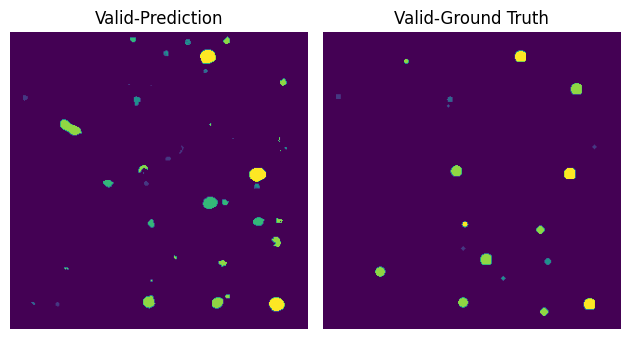

Train-Epoch: 27, Loss: 0.45596453926780006:  96%|█████████▋| 55/57 [00:17<00:00,  3.21it/s]


####################### valid-experiments: TS_99_9 #######################
####################### valid-experiments: TS_73_6 #######################
####################### valid-experiments: TS_5_4 #######################
####################### valid-experiments: TS_69_2 #######################
####################### valid-experiments: TS_6_4 #######################
EPOCH: 27, TRAIN_SCORE: 0.061816240940111


Valid-Epoch: 27, Loss: 0.47500605270792934: 100%|██████████| 184/184 [00:06<00:00, 28.07it/s]


####################### valid-experiments: TS_86_3 #######################
####################### valid-experiments: TS_6_6 #######################
EPOCH: 27, VALID_SCORE: 0.07487876671408959


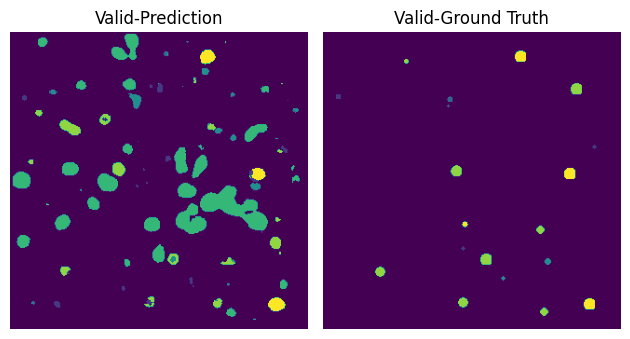

Train-Epoch: 28, Loss: 0.3878992802717469:  96%|█████████▋| 55/57 [00:16<00:00,  3.33it/s] 


####################### valid-experiments: TS_6_4 #######################
####################### valid-experiments: TS_69_2 #######################
####################### valid-experiments: TS_99_9 #######################
####################### valid-experiments: TS_5_4 #######################
####################### valid-experiments: TS_73_6 #######################
EPOCH: 28, TRAIN_SCORE: 0.047801602982848794


Valid-Epoch: 28, Loss: 0.534096078375233: 100%|██████████| 184/184 [00:07<00:00, 24.42it/s]  


####################### valid-experiments: TS_86_3 #######################
####################### valid-experiments: TS_6_6 #######################
EPOCH: 28, VALID_SCORE: 0.037924534513192804


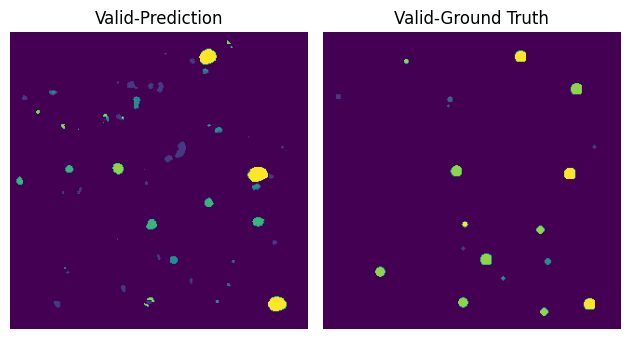

Train-Epoch: 29, Loss: 0.41661750213666393:  96%|█████████▋| 55/57 [00:16<00:00,  3.35it/s]


####################### valid-experiments: TS_5_4 #######################
####################### valid-experiments: TS_6_4 #######################
####################### valid-experiments: TS_99_9 #######################
####################### valid-experiments: TS_69_2 #######################
####################### valid-experiments: TS_73_6 #######################
EPOCH: 29, TRAIN_SCORE: 0.04253737137537333


Valid-Epoch: 29, Loss: 0.6168479172097843: 100%|██████████| 184/184 [00:06<00:00, 26.43it/s] 


####################### valid-experiments: TS_86_3 #######################
####################### valid-experiments: TS_6_6 #######################
EPOCH: 29, VALID_SCORE: 0.039124656190401064


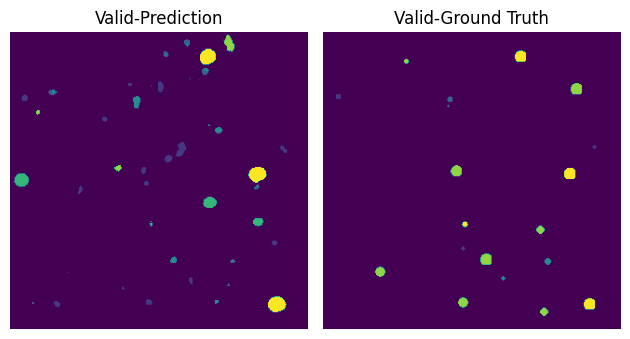

Train-Epoch: 30, Loss: 0.4641053091395985:  96%|█████████▋| 55/57 [00:21<00:00,  2.60it/s] 


####################### valid-experiments: TS_6_4 #######################


In [ ]:
model = UNet_2D().to("cuda")
model.eval()


optimizer = torch.optim.AdamW(model.parameters(), lr=5e-4)
criterion = nn.CrossEntropyLoss(
    # weight=torch.tensor([0, 0.1000, 14.4163, 14.1303, 1.0000, 2.2055, 4.4967]).to(
    #     "cuda"
    # )
    weight=torch.tensor([0.5, 32, 32, 32, 32, 32, 32]).to("cuda")
)
# criterion = DiceLoss()

best_model = None
best_score = 0
batch_size = 8

for epoch in range(100):
    train_loss = []
    valid_loss = []
    train_pred_tomogram = defaultdict(list)
    train_gt_tomogram = defaultdict(list)
    valid_pred_tomogram = defaultdict(list)
    valid_gt_tomogram = defaultdict(list)
    model.train()
    tq = tqdm(range(len(train_loader) * normalized_tomogram.shape[0] // batch_size))
    for data in train_loader:
        exp_name = data["exp_name"][0]
        tomogram = data["normalized_tomogram"]
        segmentation_map = data["segmentation_map"].long()

        for i in range(batch_size, tomogram.shape[1], batch_size):
            optimizer.zero_grad()
            from_, to_ = 0, tomogram.shape[1]
            random_index = random.sample(range(from_, to_), batch_size)
            input_ = tomogram[:, random_index]
            input_ = input_.permute(1, 0, 2, 3)  # (batch_size, 1, 160, 160)
            gt = segmentation_map[:, random_index].squeeze()  # (batch_size, 160, 160)

            input_, gt = aug(input_, gt)

            input_ = input_.to("cuda")
            gt = gt.to("cuda")
            output = model(input_)
            loss = criterion(output, gt)
            loss.backward()
            optimizer.step()

            train_loss.append(loss.item())
            tq.set_description(f"Train-Epoch: {epoch}, Loss: {np.mean(train_loss)}")
            tq.update(1)

            for i in range(batch_size):
                train_pred_tomogram[exp_name].append(
                    output[i].unsqueeze(0).cpu().detach().numpy()
                )
                train_gt_tomogram[exp_name].append(
                    gt[i].unsqueeze(0).cpu().detach().numpy()
                )
    tq.close()

    train_score_ = visualize_epoch_results(
        train_pred_tomogram,
        train_gt_tomogram,
        sikii_dict=CFG.initial_sikii,
    )

    print(f"EPOCH: {epoch}, TRAIN_SCORE: {train_score_}")

    ############################################# valid #############################################

    model.eval()
    tq = tqdm(range(len(valid_loader) * normalized_tomogram.shape[0]))
    for data in valid_loader:
        exp_name = data["exp_name"][0]
        tomogram = data["normalized_tomogram"].to("cuda")
        segmentation_map = data["segmentation_map"].to("cuda").long()

        for i in range(tomogram.shape[1]):
            input_ = tomogram[:, i].unsqueeze(0)
            gt = segmentation_map[:, i]

            output = model(input_)
            loss = criterion(output, gt)

            valid_loss.append(loss.item())
            tq.set_description(f"Valid-Epoch: {epoch}, Loss: {np.mean(valid_loss)}")
            tq.update(1)

            valid_pred_tomogram[exp_name].append(output.cpu().detach().numpy())
            valid_gt_tomogram[exp_name].append(gt.cpu().detach().numpy())
    tq.close()

    valid_score_ = visualize_epoch_results(
        valid_pred_tomogram,
        valid_gt_tomogram,
        sikii_dict=CFG.initial_sikii,
    )

    print(f"EPOCH: {epoch}, VALID_SCORE: {valid_score_}")

    if valid_score_ > best_score:
        best_score = valid_score_
        best_model = model
        torch.save(model.state_dict(), f"best_model.pth")

    # 可視化
    index = 20

    # plt.figure(figsize=(10, 5))

    # ax = plt.subplot(1, 4, 1)
    # ax.imshow(train_pred_tomogram[exp_name][index].argmax(0))
    # ax.set_title("Train-Prediction")
    # ax.axis("off")

    # ax = plt.subplot(1, 4, 2)
    # ax.imshow(train_gt_tomogram[exp_name][index])
    # ax.set_title("Train-Ground Truth")
    # ax.axis("off")

    ax = plt.subplot(1, 2, 1)
    ax.imshow(valid_pred_tomogram[exp_name][index].argmax(1).squeeze(0))
    ax.set_title("Valid-Prediction")
    ax.axis("off")

    ax = plt.subplot(1, 2, 2)
    ax.imshow(valid_gt_tomogram[exp_name][index].squeeze(0))
    ax.set_title("Valid-Ground Truth")
    ax.axis("off")

    plt.tight_layout()

    plt.show()

    # save_images(
    #     train_gt_tomogram=train_gt_tomogram,
    #     train_pred_tomogram=train_pred_tomogram,
    #     valid_gt_tomogram=valid_gt_tomogram,
    #     valid_pred_tomogram=valid_pred_tomogram,
    #     save_dir="images",
    #     epoch=epoch,
    # )

In [ ]:
# 可視化
index = 50

plt.figure(figsize=(10, 5))

# ax = plt.subplot(1, 4, 1)
# ax.imshow(train_pred_tomogram[exp_name][index].argmax(0))
# ax.set_title("Train-Prediction")
# ax.axis("off")

# ax = plt.subplot(1, 4, 2)
# ax.imshow(train_gt_tomogram[exp_name][index])
# ax.set_title("Train-Ground Truth")
# ax.axis("off")

ax = plt.subplot(1, 2, 1)
ax.imshow(valid_pred_tomogram[exp_name][index].argmax(1).squeeze(0))
ax.set_title("Valid-Prediction")
ax.axis("off")

ax = plt.subplot(1, 2, 2)
ax.imshow(valid_gt_tomogram[exp_name][index].squeeze(0))
ax.set_title("Valid-Ground Truth")
ax.axis("off")

plt.tight_layout()

plt.show()

In [ ]:
train_score_ = visualize_epoch_results(
    train_pred_tomogram,
    train_gt_tomogram,
    sikii_dict=CFG.initial_sikii,
)

print(f"EPOCH: {epoch}, VALID_SCORE: {train_score_}")